# 1. Analysis Seoul CCTV

## 1. 프로젝트개요

- 서울시 CCTV 분석

### 강의 목표

- python

- pandas

- matplotlib

### 프로젝트 목표

- 서울시 구별 CCTV 현황 데이터 확보

- 인구 현황 데이터 확보

- CCTV 데이터와 인구 현황 데이터 합치기

- 데이터를 정리하고 정렬하기

- 그래프를 그리기

- 전체적인 경향 파악하기

- 경향에서 벗어난 데이터 강조하기

## 2. 데이터 얻기

- 서울시 구별 CCTV 현황과 구별 인구 현황 데이터 얻기

## 3. 데이터 읽기

### pandas에서 엑셀 및 텍스트 파일 읽기


#### pandas란

- 파이썬에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈

- 단일 프로세스 최대 효율

- 코딩 가능하고 응용 가능한 엑셀

- 판다스 모듈 임포트

In [2]:
import pandas as pd

- 원하는 모듈이 설치되어 있다면 import 명령을 통해 사용하겠다고 선언한다.

#### 파이썬 모듈 네이밍 규칙

- import module -> 모듈을 사용하겠다

- import module as md -> md라는 이름으로 모듈을 사용하겠다

- from module import function -> 모듈에 포함된 function함수만 사용하겠다


#### Pandas DataFrame 구조

- index, cloumn, columnName, Values

In [3]:
CCTV_Seoul = pd.read_csv('./data_AnalysisSeoulCCTV/01. Seoul_CCTV.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [5]:
CCTV_Seoul.head(10)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


- 끝 데이터 추출

In [6]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


- column의 이름을 조회할 수 있다.

In [7]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

리스트 형태로 반환

In [8]:
CCTV_Seoul.columns[0]

'기관명'

- 컬럼 이름 바꾸기

- inplace =True - 변경된 사항을 저장하는 코드

In [9]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : "구별"}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


- 엑셀 파일 열기

In [10]:
pop_Seoul=pd.read_excel('./data_AnalysisSeoulCCTV/01. Seoul_Population.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,4220082,10124579,4957857,5166722,9857426,4830206,5027220,267153,127651,139502,2.34,1365126
3,2017,종로구,73594,164257,80094,84163,154770,75967,78803,9487,4127,5360,2.1,26182
4,2017,중구,60412,134593,66337,68256,125709,62253,63456,8884,4084,4800,2.08,21384


- 엑셀 설정

- 자료를 읽기 시작할 Header를 설정

- 읽어올 엑셀의 칼럼을 지정(usecols)

In [11]:
pop_Seoul = pd.read_excel('./data_AnalysisSeoulCCTV/01. Seoul_Population.xls', header=2, usecols="B, D, G, J, N")
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


- 컬럼 이름 바꾸기

In [12]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0] : "구별",
        pop_Seoul.columns[1] : "인구수",
        pop_Seoul.columns[2] : "한국인",
        pop_Seoul.columns[3] : "외국인",
        pop_Seoul.columns[4] : "고령자"
    },
    inplace=True
)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


## 4. 판다스 기초

- R만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈

- 단일 프로세스 최데 효율

- 코딩이 가능한 엑셀

- 스테로이드 맞은 엑설로 표현

### 판다스에서 엑셀 및 텍스트 파일 읽기


- pandas는 통상 pd로 import 한다.

- 수치 해석적 함수가 많은 numpy는 통상 np로 import 한다


In [13]:
import pandas as pd
import numpy as np

- pandas의 데이터형을 구성하는 기본은 Series 이다

- index와 value로 이루어져 있다.

- 한 가지 데이터  타이반 가질 수 있다.

In [14]:
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In [15]:
pd.Series([1,2,3,4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [16]:
pd.Series([1,2,3,4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [17]:
pd.Series(np.array([1,2,3]))

0    1
1    2
2    3
dtype: int32

In [18]:
pd.Series({'key':'value'})

key    value
dtype: object

In [19]:
data = pd.Series([1,2,3,4,'5'])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

- 짝수를 찾고 싶다

In [20]:
data % 2

TypeError: not all arguments converted during string formatting

In [21]:
data = pd.Series([1,2,3,4])
data % 2

0    1
1    0
2    1
3    0
dtype: int64

In [22]:
s = pd.Series([1,3,5, np.nan, 6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- 날짜를 이용할 수 있다.

- period - 기간

In [23]:
dates = pd.date_range("20130101",periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [24]:
dates = pd.date_range("20210101",periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

- pandas에서 가장 많이 사용되는 데이터 형은 DataFrame이다.

- index와 columns를 지정하면 된다.

In [25]:
df = pd.DataFrame(np.random.rand(6,4), index=dates, columns=["A","B","C","D"])
df

,A,B,C,D
2021-01-01,0.958469,0.811554,0.973106,0.214726
2021-01-02,0.264124,0.892060,0.952744,0.308516
2021-01-03,0.325609,0.116668,0.395746,0.217847
2021-01-04,0.415026,0.030849,0.744007,0.350606
2021-01-05,0.151266,0.644050,0.737646,0.958025
2021-01-06,0.999985,0.168934,0.566594,0.684940


- 앞부분 5개의 데이터 확인

In [26]:
df.head()

,A,B,C,D
2021-01-01,0.958469,0.811554,0.973106,0.214726
2021-01-02,0.264124,0.892060,0.952744,0.308516
2021-01-03,0.325609,0.116668,0.395746,0.217847
2021-01-04,0.415026,0.030849,0.744007,0.350606
2021-01-05,0.151266,0.644050,0.737646,0.958025


- DataFrame의 index확인

In [27]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

- DataFrame columns확인

In [42]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- DataFrame value확인

In [43]:
df.values

array([[0.95846881, 0.81155425, 0.97310599, 0.21472629],
       [0.26412399, 0.89206016, 0.95274384, 0.30851576],
       [0.32560871, 0.1166683 , 0.39574587, 0.21784663],
       [0.41502599, 0.03084921, 0.74400688, 0.35060601],
       [0.15126635, 0.64404954, 0.73764648, 0.95802544],
       [0.99998519, 0.16893396, 0.56659379, 0.68493953]])

- DataFrame의 기본정보 확인

- 각 칼럼의 크기와 데이터 형태를 확인하는 경우가 많다

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 412.0 bytes


- DataFrame의 통계적 기본 정보 확인

In [45]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.519080,0.444019,0.728307,0.455777
std,0.366846,0.381936,0.222432,0.300743
min,0.151266,0.030849,0.395746,0.214726
25%,0.279495,0.129735,0.609357,0.240514
50%,0.370317,0.406492,0.740827,0.329561
75%,0.822608,0.769678,0.900560,0.601356
max,0.999985,0.892060,0.973106,0.958025


- sort_values -> 데이터를 정렬

In [46]:
df.sort_values(by="B", ascending=False) # B를 기준으로 내림차순 정렬

,A,B,C,D
2021-01-02,0.264124,0.892060,0.952744,0.308516
2021-01-01,0.958469,0.811554,0.973106,0.214726
2021-01-05,0.151266,0.644050,0.737646,0.958025
2021-01-06,0.999985,0.168934,0.566594,0.684940
2021-01-03,0.325609,0.116668,0.395746,0.217847
2021-01-04,0.415026,0.030849,0.744007,0.350606


- 특정 컬럼만 읽기

In [47]:
df['A']

2021-01-01    0.958469
2021-01-02    0.264124
2021-01-03    0.325609
2021-01-04    0.415026
2021-01-05    0.151266
2021-01-06    0.999985
Freq: D, Name: A, dtype: float64

In [48]:
df["B"]

2021-01-01    0.811554
2021-01-02    0.892060
2021-01-03    0.116668
2021-01-04    0.030849
2021-01-05    0.644050
2021-01-06    0.168934
Freq: D, Name: B, dtype: float64

- [n:m] -> n부터 m-1까지

- 인텍스나 컬럼의 이름으로 slice하는 경우는 끝을 포함함

In [52]:
df[0:3]

,A,B,C,D
2021-01-01,0.958469,0.811554,0.973106,0.214726
2021-01-02,0.264124,0.892060,0.952744,0.308516
2021-01-03,0.325609,0.116668,0.395746,0.217847


In [51]:
df['20130102':'20130104']

,A,B,C,D


- 이름으로도 사용가능

- pandas의 보편적인 slice 옵션

- loc: location

In [37]:
df.loc[:,["A","B"]]

,A,B
2021-01-01,0.958469,0.811554
2021-01-02,0.264124,0.892060
2021-01-03,0.325609,0.116668
2021-01-04,0.415026,0.030849
2021-01-05,0.151266,0.644050
2021-01-06,0.999985,0.168934


In [38]:
df.loc["20130102":"20130104",["A","B"]]

,A,B


In [39]:
df.loc["20130102":"20130104",["A","D"]]

,A,D


In [41]:
df.loc["20130102",["A","B"]]

KeyError: '20130102'

- iloc 옵션을 이용해서 번호로만 접근 가능

In [27]:
df.iloc[3]

A    0.693971
B    0.465498
C    0.677481
D    0.631794
Name: 2013-01-04 00:00:00, dtype: float64

In [28]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.693971,0.465498
2013-01-05,0.386066,0.326953


In [29]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.788875,0.163100
2013-01-03,0.341406,0.567052
2013-01-05,0.386066,0.315759


In [30]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.783254,0.905939
2013-01-02,0.782937,0.163100
2013-01-03,0.841239,0.567052
2013-01-04,0.465498,0.677481
2013-01-05,0.326953,0.315759
2013-01-06,0.741572,0.794622


- df[condition]과 같이 사용하는 것이 일반적

- pandas의 버전에 따라 조금씩 허용되는 문법이 다름

- pandas 버전확인 필수

In [31]:
df

,A,B,C,D
2013-01-01,0.750992,0.783254,0.905939,0.472040
2013-01-02,0.788875,0.782937,0.163100,0.983259
2013-01-03,0.341406,0.841239,0.567052,0.576276
2013-01-04,0.693971,0.465498,0.677481,0.631794
2013-01-05,0.386066,0.326953,0.315759,0.851632
2013-01-06,0.326285,0.741572,0.794622,0.975488


In [32]:
df[df["A"]>0]

,A,B,C,D
2013-01-01,0.750992,0.783254,0.905939,0.472040
2013-01-02,0.788875,0.782937,0.163100,0.983259
2013-01-03,0.341406,0.841239,0.567052,0.576276
2013-01-04,0.693971,0.465498,0.677481,0.631794
2013-01-05,0.386066,0.326953,0.315759,0.851632
2013-01-06,0.326285,0.741572,0.794622,0.975488


In [33]:
df[df>0]

,A,B,C,D
2013-01-01,0.750992,0.783254,0.905939,0.472040
2013-01-02,0.788875,0.782937,0.163100,0.983259
2013-01-03,0.341406,0.841239,0.567052,0.576276
2013-01-04,0.693971,0.465498,0.677481,0.631794
2013-01-05,0.386066,0.326953,0.315759,0.851632
2013-01-06,0.326285,0.741572,0.794622,0.975488


In [34]:
df["E"] = ["one","one","two","three","four","three"]
df

,A,B,C,D,E
2013-01-01,0.750992,0.783254,0.905939,0.472040,one
2013-01-02,0.788875,0.782937,0.163100,0.983259,one
2013-01-03,0.341406,0.841239,0.567052,0.576276,two
2013-01-04,0.693971,0.465498,0.677481,0.631794,three
2013-01-05,0.386066,0.326953,0.315759,0.851632,four
2013-01-06,0.326285,0.741572,0.794622,0.975488,three


- 특정 요소가 있는지 확인

In [35]:
df["E"].isin(["two","four"])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

- 특정 요소가 있는 행만 선택

In [36]:
df[df["E"].isin(["two","four"])]

,A,B,C,D,E
2013-01-03,0.341406,0.841239,0.567052,0.576276,two
2013-01-05,0.386066,0.326953,0.315759,0.851632,four


In [37]:
df

,A,B,C,D,E
2013-01-01,0.750992,0.783254,0.905939,0.472040,one
2013-01-02,0.788875,0.782937,0.163100,0.983259,one
2013-01-03,0.341406,0.841239,0.567052,0.576276,two
2013-01-04,0.693971,0.465498,0.677481,0.631794,three
2013-01-05,0.386066,0.326953,0.315759,0.851632,four
2013-01-06,0.326285,0.741572,0.794622,0.975488,three


- 특정 컬럼 제거

In [38]:
del df["E"]
df

,A,B,C,D
2013-01-01,0.750992,0.783254,0.905939,0.472040
2013-01-02,0.788875,0.782937,0.163100,0.983259
2013-01-03,0.341406,0.841239,0.567052,0.576276
2013-01-04,0.693971,0.465498,0.677481,0.631794
2013-01-05,0.386066,0.326953,0.315759,0.851632
2013-01-06,0.326285,0.741572,0.794622,0.975488


- 각 컬럼 누적합 함수를 적용

In [39]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.750992,0.783254,0.905939,0.472040
2013-01-02,1.539868,1.566191,1.069039,1.455299
2013-01-03,1.881274,2.407430,1.636091,2.031575
2013-01-04,2.575246,2.872928,2.313572,2.663369
2013-01-05,2.961311,3.199881,2.629330,3.515002
2013-01-06,3.287597,3.941453,3.423952,4.490490


### 5. CCTV 데이터 훑어보기

- CCTV 앞부분 데이터 확인

In [40]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


- CCTV를 가장 적게 보유한 구

In [41]:
CCTV_Seoul.sort_values(by="소계",ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


- CCTV를 가장 많이 보유한 구

In [42]:
CCTV_Seoul.sort_values(by="소계",ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


- 최근 3년간 그 전 보유한 CCTV 개수 대비 CCTV를 많이 설치간 구는 어디인가?

In [43]:
CCTV_Seoul["최근증가율"]=(
    (CCTV_Seoul["2016년"]+CCTV_Seoul["2015년"]+CCTV_Seoul["2014년"])
    /CCTV_Seoul["2013년도 이전"]
    * 100
)
CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 6. 인구현황 데이터 훑어보기

- 서울시 인구 데이터 확인

In [44]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


- 첫 행(0번)의 합계 데이터는 필요 없다

- 행을 지우는 명령어 -> Drop

In [45]:
pop_Seoul.drop([0],inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


- unique 조사

- 현재는 양이 적지만, 데이터가 많아지면 unique 조사를 통해 데이터를 초반 검증한다.

In [46]:
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [47]:
len(pop_Seoul["구별"].unique())

25

- 외국인 비율과 고령자 비율을 만들어 놓음

- 데이터가 25개인데 한줄로 의도한 바를 이룸

- 컬럼 연산이 편하다는 것이 python 장점

In [48]:
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


- 인구수가 많은 구는 어디인가?

In [49]:
pop_Seoul.sort_values(by="인구수",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


- 외국인이 많은 구는 어디인가?

In [50]:
pop_Seoul.sort_values(by="외국인",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


- 외국인 비율이 높은 구는?

In [51]:
pop_Seoul.sort_values(by="외국인비율",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


- 고령자가 많은 구는?

In [52]:
pop_Seoul.sort_values(by="고령자",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


- 고령자비율이 높은 구는?

In [53]:
pop_Seoul.sort_values(by="고령자비율",ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


## 7. 두데이터 합치기

### Pandas 데이터 merge를 이용해서 병합하기

- merge를 이용한 데이터 병합

- pandas DataFrame 데이터끼리의 병합은 빈번히 발생함

- 병합 후 데이터가 엉망이 되지 않도록 주의 해야함

In [57]:
left = pd.DataFrame(
    {
        "key": ["K0","K4","K2","K3"],
        "A": ["A0","A1","A2","A3"],
        "B": ["B0","B1","B2","B3"]
    }
)

right = pd.DataFrame(
    {
        "key": ["K0","K1","K2","K3"],
        "C": ["C0","C1","C2","C3"],
        "D": ["D0","D1","D2","D3"]
    }
)

In [58]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [59]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


- key 컬럼을 기준으로 병합

In [60]:
pd.merge(left,right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


- left에 key를 기준으로 right 병합

In [61]:
pd.merge(left,right, how="left",on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


- right에 key를 기준으로 left 병합

In [62]:
pd.merge(left, right, how='right',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


- 둘 다 손상되지 않도록 key를 기준으로 병합

In [63]:
pd.merge(left,right,how="outer",on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


- key 컬럼에서 두 데이터에 공통분모만 병합

In [64]:
pd.merge(left,right,how="inner",on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


- 데이터 합치기

In [65]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


- 필요 없는 컬럼 제거

In [66]:
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


- pandas index 지정

- 데이터를 정리하는 과정에서 index를 재지정할 때가 있다.

- 여기서 unique한 데이터인 '구별'로 index를 잡자

- index를 재지정하는 명령어은 set_index이다

In [67]:
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


### 상관 관계

- 두 변량 사이에 한쪽이 증가하면 다른 쪽도 증가(또는 감소) 하는 경향이 있을 때 이 두변량 사이에는 상관관계가 있다고 함.

- 단 상관관계가 있다하여 두 변량이 인과 관계가 있는 것은 아님

- r = -1 -> 음의 상관 관계가 강하다

- -1< r < 0 -> 음의 상관 관계가 있기는 하다

- r = 0 -> 상관 관계까 없다

- 0 < r <0 -> 양의 상관 관계가 있기는 하다

- r = 1 -> 양의 상관 관계가 강하다

- 0.2 이하 -> 상관 관계가 없거나 무시해도 좋은 수준

- 0.4 이하 -> 약한 상관 관계

- 0.6 이상 -> 강한 상관 관계

- 데이터 관계를 찾을 때, 최소한의 근거가 있어야 해당 데이터를 비교하는 의미가 존재한다.

- 상관 계수를 0.2 이상의 데이터를 비교하는 것은 의미가 있다.

- CCTV 전체 수(소계)와 가장 상관 관계가 있는 데이터는 인구수 이다.

In [68]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


- CCTV 비율을 만들어 CCTV 비율이 높은 구를 보자

In [69]:
data_result["CCTV비율"] = (data_result["소계"] / data_result["인구수"])*100
data_result.sort_values(by="CCTV비율",ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


- 인구대비 CCTV 비율이 낮은 구를 보자

In [70]:
data_result.sort_values(by="CCTV비율",ascending=True).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


## 8. matplotlib 기초

- 파이썬의 대표 시각화 도구

- matplotlib은 plt로 naming 하여 사용

- Jupyter  Notebook 유저의 경우 matplotlib의 결과가 out session에 나타나는 것이 유리으모 %matplotlib inline 옵션을 사용한다.

In [71]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic("matplotlib","inline")

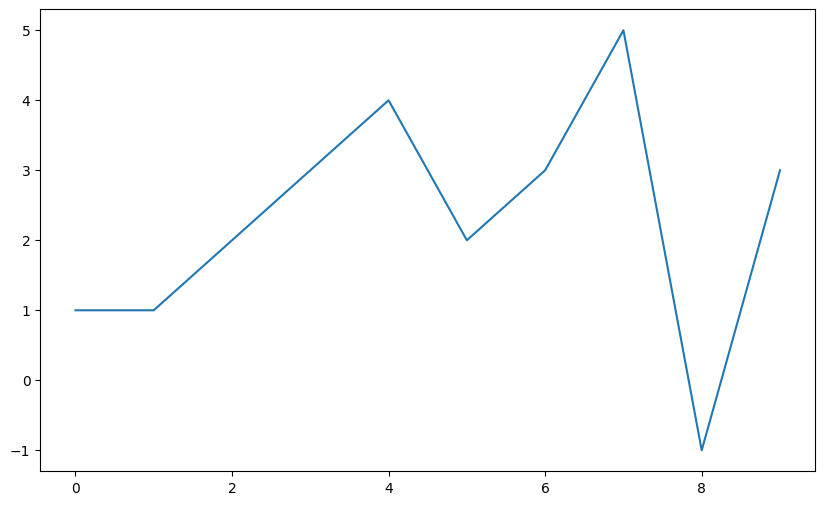

In [72]:
plt.figure(figsize=(10,6))
plt.plot([0,1,2,3,4,5,6,7,8,9],[1,1,2,3,4,2,3,5,-1,3])
plt.show()

### 삼각함수 그리기

- numpy의 sin함수

- np.arange(a,b,s) -> a부터 b까지의 s의 간격

- np.sin(value)

In [74]:
import numpy as np
t = np.arange(0,12,0.01)
y = np.sin(t)

- 수업에서는 그래프의 결과가 중요한 경우 그래프 그리는 코드를 def()로 작성 -> 별도의 셀에서 그림만 나타낼 수 있음

In [1]:
def drawGraph():
    plt.figure(figsize=(10,6))
    plt.plot(t,np.sin(t),label="sin")
    plt.plot(t,np.cos(t),label="cos")
    plt.grid()
    plt.legend(loc = "upper right")
    plt.xlabel("time")
    plt.ylabel('Amplitude')
    plt.title("Example of sinewave")
    plt.show()

In [2]:
drawGraph()

NameError: name 'plt' is not defined

In [77]:
t = np.arange(0,5,0.5)

def drawGraph():
    plt.figure(figsize=(10,6))
    plt.plot(t,t,"r--")
    plt.plot(t,t**2,"bs")
    plt.plot(t,t**3,"g^")
    plt.show()

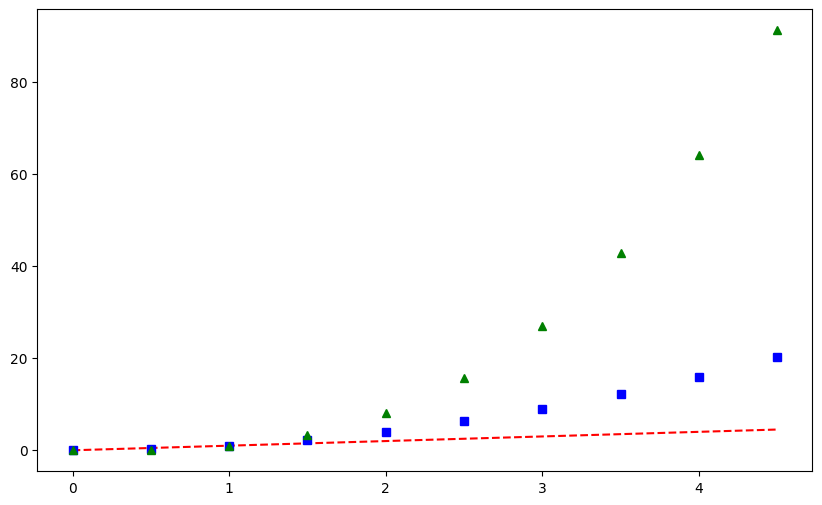

In [78]:
drawGraph()

In [79]:
t = [0,1,2,3,4,5,6]
y = [1,4,5,8,9,5,3]

def drawGraph():
    plt.figure(figsize=(10,6))
    plt.plot(
        t,
        y,
        color = "green",
        linestyle="dashed",
        marker="o",
        markerfacecolor = "blue",
        markersize=12,
    )
    plt.xlim([-0.5,6.5])
    plt.ylim([0.5,9.5])
    plt.show()

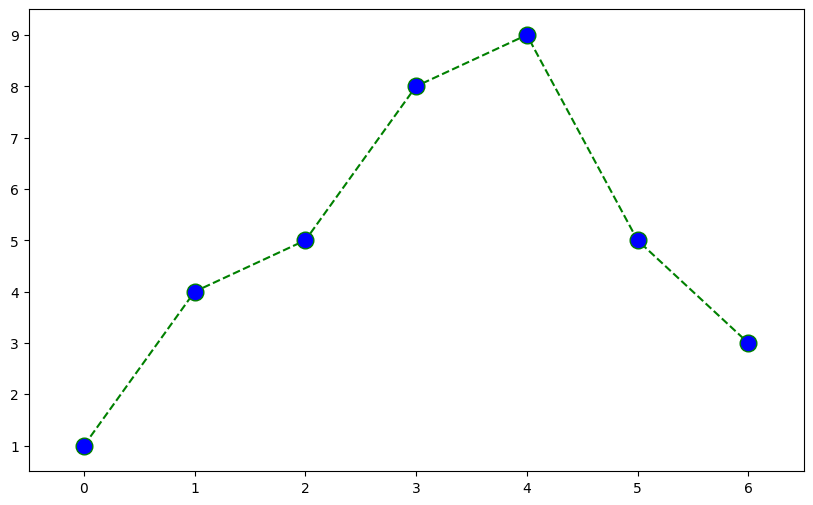

In [80]:
drawGraph()

- scatter는 점을 뿌리듯이 그리는 그림

In [81]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

def drawGraph():
    plt.figure(figsize=(10,6))
    plt.scatter(t,y)
    plt.show()

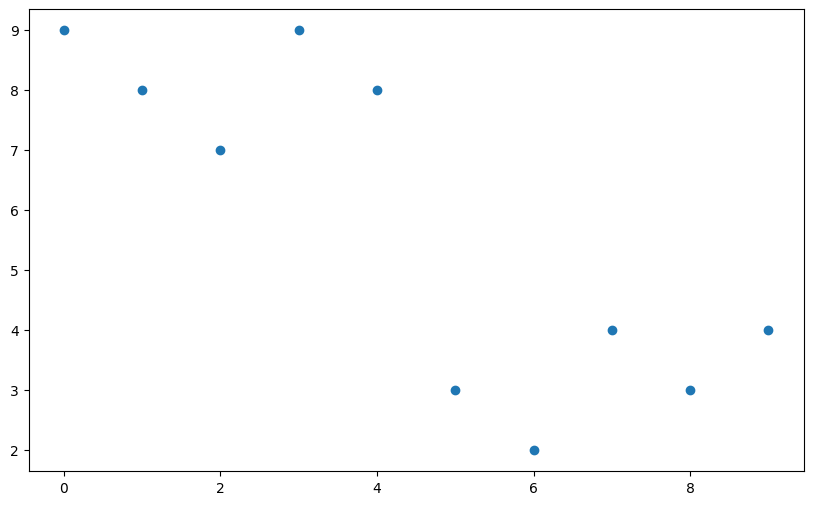

In [82]:
drawGraph()

In [83]:
colormap = t

def drawGraph():
    plt.figure(figsize=(10,6))
    plt.scatter(t,y, s=50, c=colormap, marker=">")
    plt.colorbar()
    plt.show()

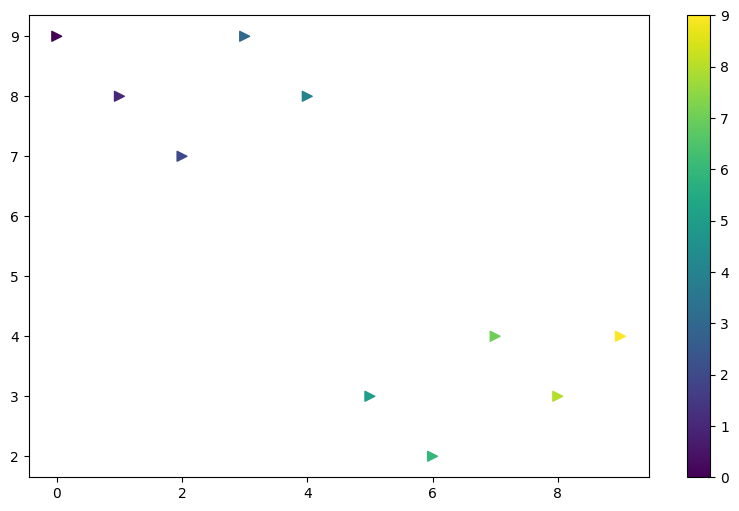

In [84]:
drawGraph()

## 9. 데이터 시각화

In [88]:
plt.rcParams["axes.unicode_minus"] = False
from matplotlib import rc
rc('font',family='Malgun Gothic')

In [89]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


- pandas DataFrame은 데이터 변수에서 바로 plot() 명렬을 사용할 수 있다.

- 데이터(칼럼)가 많은 경우 정렬한 후 그리는 것이 효과적일 경우가 많다.

<Axes: ylabel='구별'>

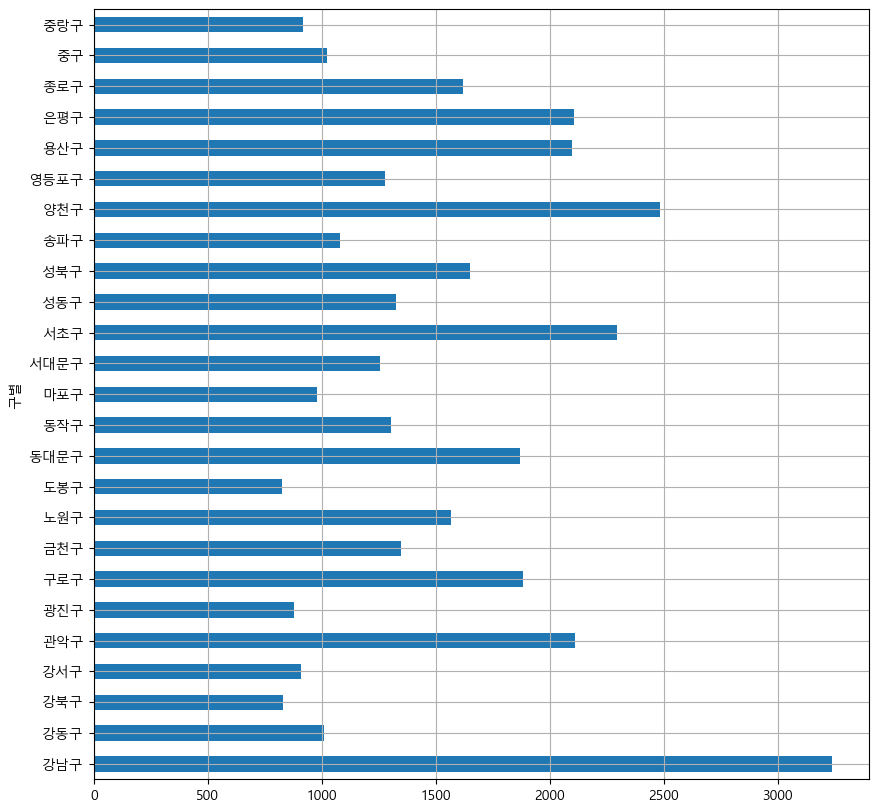

In [90]:
data_result["소계"].plot(kind="barh",grid=True, figsize=(10,10))

- 정보 정렬

In [93]:
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind="barh",
        grid =True,
        title = "가장 CCTV가 많은 구",
        figsize = (10,10)
    )

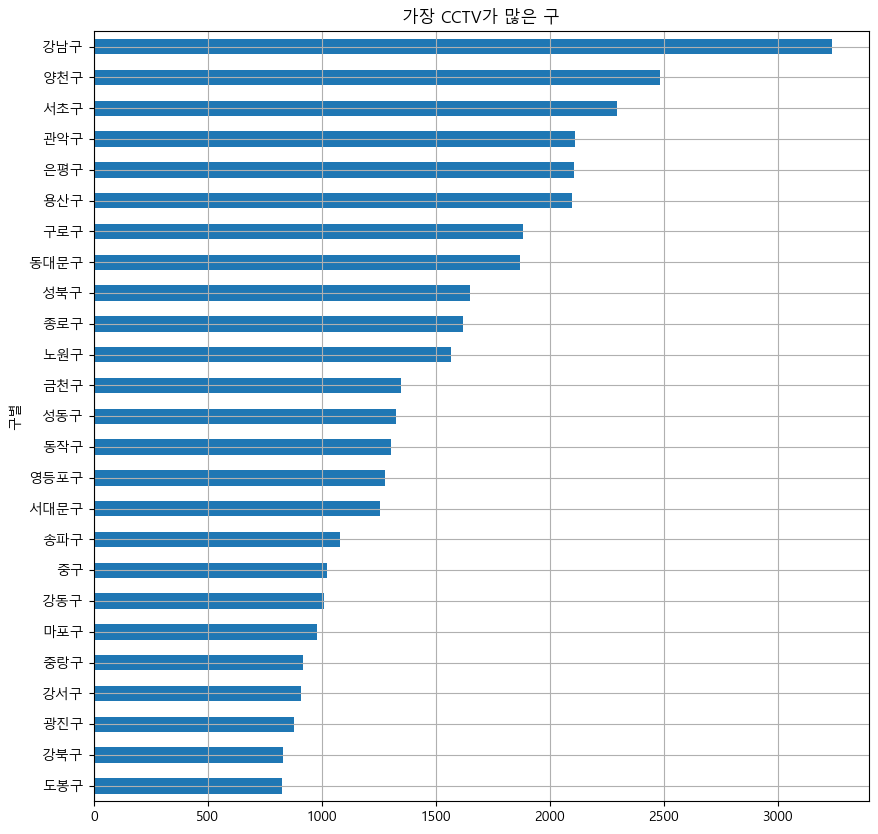

In [94]:
drawGraph()

In [95]:
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh",
        grid =True,
        title = "가장 CCTV가 많은 구",
        figsize = (10,10)
    )

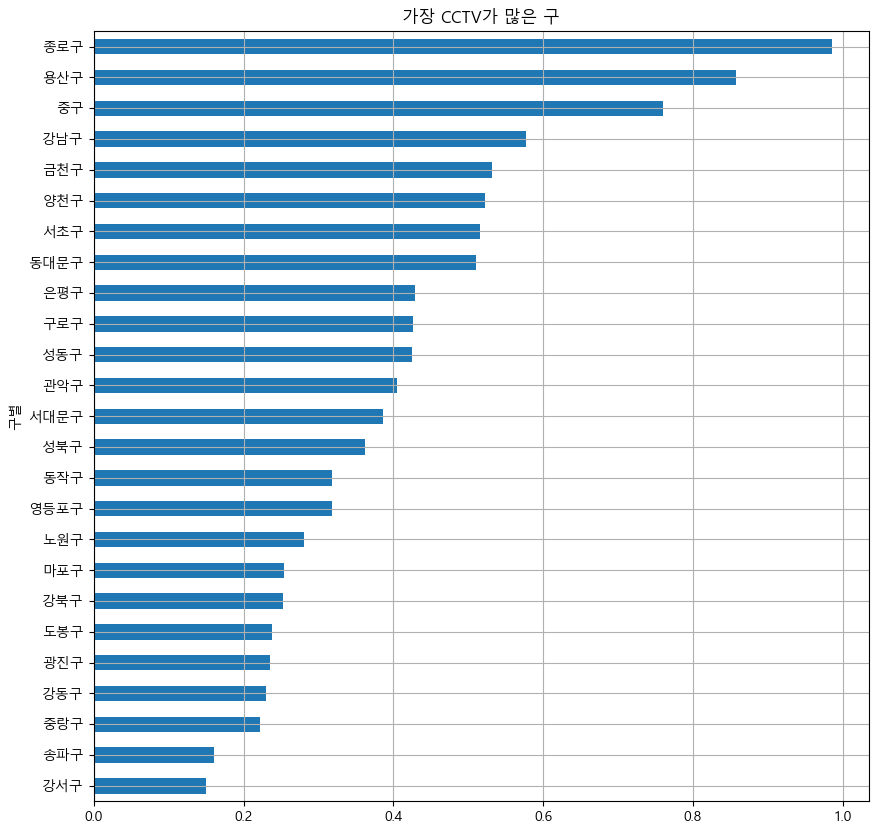

In [96]:
drawGraph()

## 10. 데이터 경향 표시

In [ ]:
data_result.head()

- 인구수와 소계 컬럼으로 scatter plot 그리기

In [97]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()

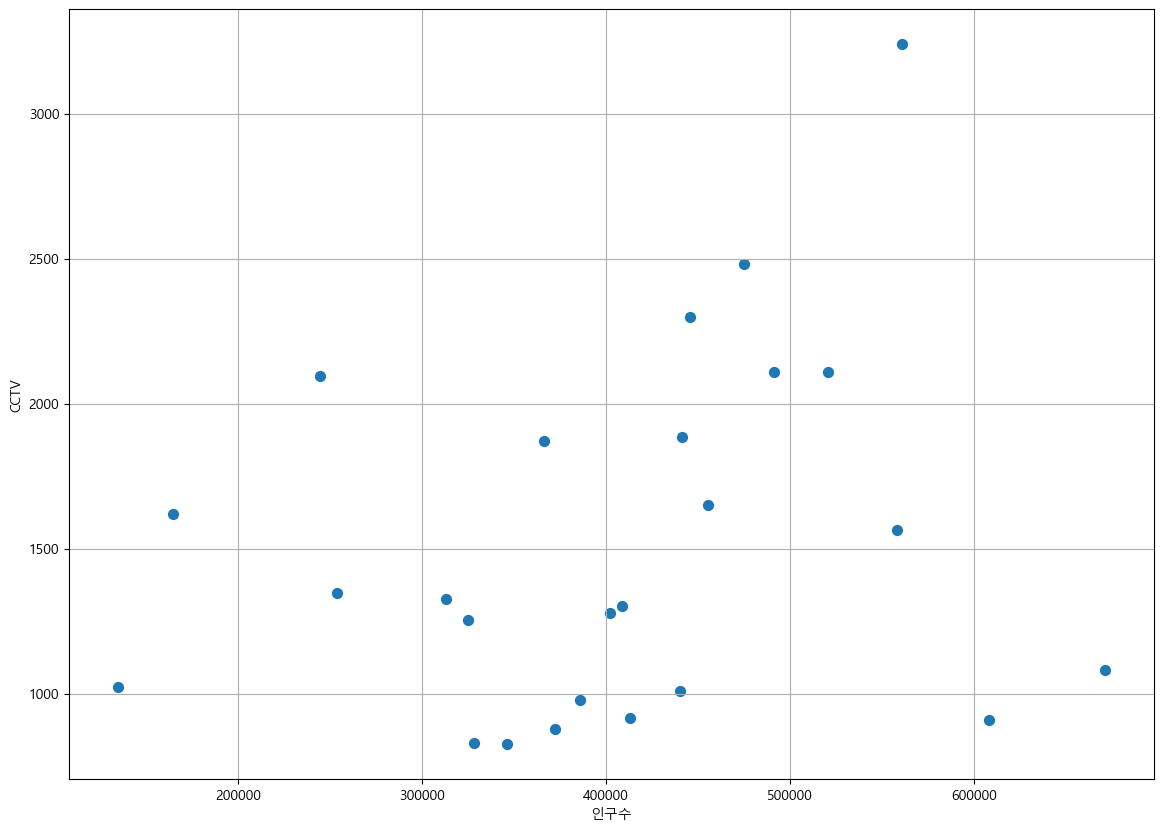

In [98]:
drawGraph()

### Linear Regression(선형 회귀)

#### numpy를 이용한 1차 직석 만들기
- numpy가 제공하는 간단한 함수를 이용해서 1차 직선을 만들어 그래프로 비교

- 절차

1. np.polyfit -> 직선을 구성하기 위한 계수 계산

2. np.poly1d -> polyfit으로 찾은 계수로 python에서 사용할 함수로 만들어줌

In [99]:
import numpy as np
fp1 = np.polyfit(data_result["인구수"],data_result["소계"],1)
fp1

array([1.11155868e-03, 1.06515745e+03])

- polyfit에서 찾은 계수를 넣어서 함수 완성

In [100]:
f1 = np.poly1d(fp1)

- 인구 400000인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수를 알아보자

In [105]:
f1(400000)

1509.780925241333

- 경향선을 그리기 위해서 X데이터 생성

- np.linspace(a,b,n) -> a부터b까지의 등 간격 데이터 생성

In [106]:
fx = np.linspace(100000,700000,100)

In [107]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"],data_result["소계"],s=50)
    plt.plot(fx,f1(fx),ls="dashed",lw=3,color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()

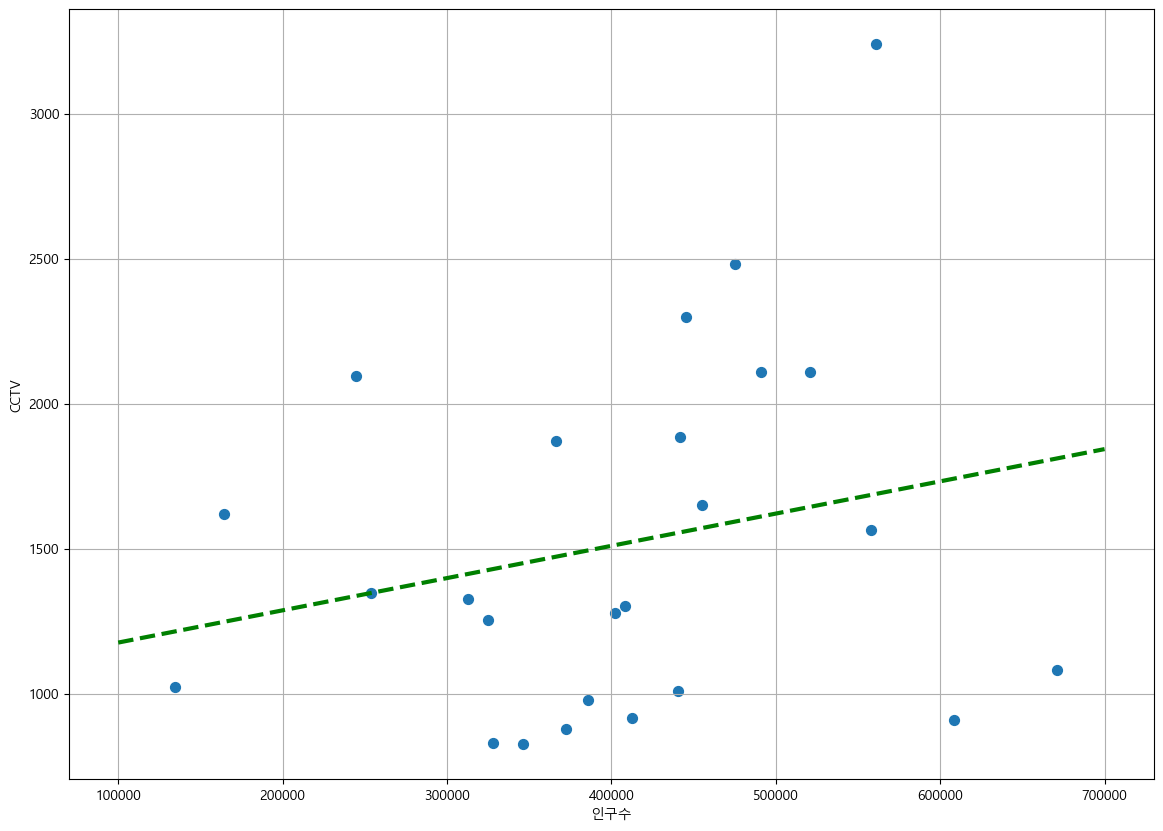

In [108]:
drawGraph()

## 11. 강조하고 싶은 데이터 시각화

### 경향에서 벗어난 데이터 강조하기






#### 경향과 오차 만들기

- data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

- 경향과 오차 만들기

- 경향은 f1함수에서 인구를 입력 -> f1(data_result["인구수"])

- 현재값 : data_result["소계"]

In [109]:
fp1 = np.polyfit(data_result["인구수"],data_result["소계"],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

df_sort_f = data_result.sort_values(by="오차",ascending=False)
df_sort_t = data_result.sort_values(by="오차",ascending=True)

- 경향대비 CCTV를 많이 가지는 구는?

In [111]:
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


- 경향 대비 CCTV를 적게 가진 구는?

In [112]:
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


- colormap을 사용자 정의(user define)로 설정

In [114]:
from matplotlib.colors import ListedColormap
color_step = ["#e74c3c","#2ecc71","#95a5a6","#2ecc71","#3498db","#3498db"]
my_cmap = ListedColormap(color_step)

- s -> 마커의 크기

- c -> color 셋팅에 방금 계산한 경향과 오차를 적용

- cmap -> 사용자 정의한 맵을 적용

- 오차가 큰 데이터 아래 위로 5개씩만 특별히 마커 옆에 구 이름을 명시

- text -> 그래프에 글자를 그리는 명령

- plt.text (x,y,text,설정)

- x,y 데이터에 1.02, 0.98을 곱한 이유 -> 구 이름이 마커에 겹치지 않도록 살짝 거리를 두게하는 의도

In [117]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], c = data_result["오차"],s=50,cmap=my_cmap)
    plt.plot(fx,f1(fx),ls="dashed",lw=3,color="grey")

    for n in range(5):
        plt.text(
            df_sort_f["인구수"][n] * 1.02,
            df_sort_t["소계"][n] * 0.98,
            df_sort_f.index[n],
            fontsize=15,
        )
        plt.text(
            df_sort_f["인구수"][n] * 1.02,
            df_sort_t["소계"][n] * 0.98,
            df_sort_t.index[n],
            fontsize=15,
        )
        plt.xlabel("인구수")
        plt.ylabel("CCTV")
        plt.grid()
        plt.show()

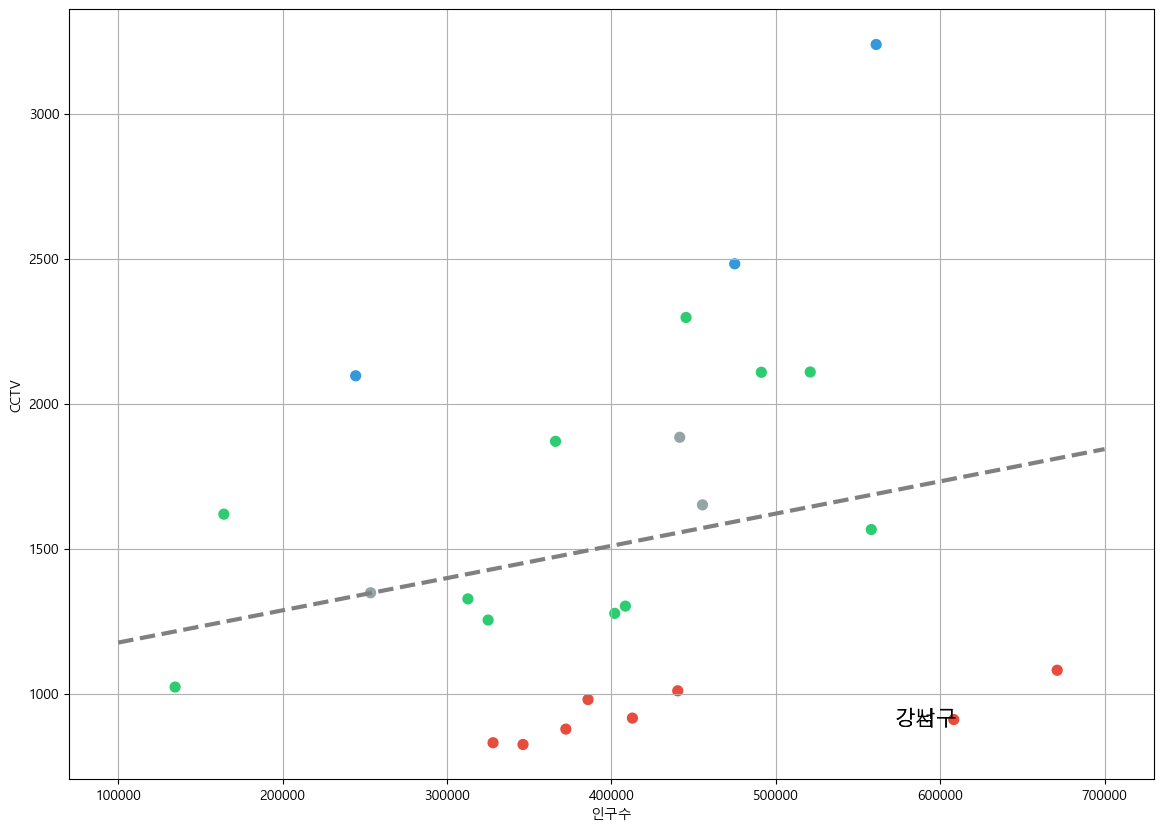

ValueError: Image size of 240321235x391624 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 123669237x298899 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 225337403x331860 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

ValueError: Image size of 248509045x318096 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [118]:
drawGraph()

In [119]:
data_result.to_csv("./data_AnalysisSeoulCCTV/CCTV_result.csv",sep=",",encoding="utf-8")